# Before Convolutional Neural Network
---

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9411385070245427992
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14385217536
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4461112016083363641
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### 데이터를 불러옵시다.

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 2473
다음 그림은 Automobile 입니다.


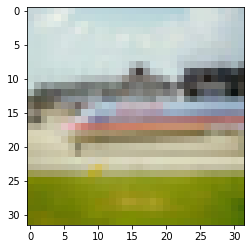

In [18]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [7]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [8]:
#############
# Your Code #
#############
# X scaling
train_x = train_x/train_x.max()
test_x = test_x/ test_x.max()
train_x.min(), train_x.max(), test_x.min(), test_x.max()

(0.0, 1.0, 0.0, 1.0)

In [9]:
#############
# Your Code #
#############
# y one-hot-encoding
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
train_y.shape

(50000, 10)

In [10]:
#############
# Your Code #
#############
# claer session
keras.backend.clear_session()
# set model
model = keras.models.Sequential()
# set layers
model.add( keras.layers.Input(shape=(32,32,3)) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(512,activation='swish') ) # swish는 relu의 파생, 0이하의 일정구간에서 음수를 살림
model.add( keras.layers.Dense(512,activation='swish') )
model.add( keras.layers.Dense(256,activation='swish') )
model.add( keras.layers.Dense(128,activation='swish') )
model.add( keras.layers.Dense(10,activation='sigmoid') )
# model compile
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

In [11]:
#############
# Your Code #
#############
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=5,
                   min_delta=0,restore_best_weights=True,verbose=1)

In [12]:
history = model.fit(train_x,train_y,epochs=100,callbacks=[es],validation_split=0.2)

Epoch 1/100
1250/1250 [==============================] - 11s 5ms/step - loss: 1.8523 - acc: 0.3248 - val_loss: 1.7351 - val_acc: 0.3834
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6821 - acc: 0.3939 - val_loss: 1.6612 - val_acc: 0.4085
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5940 - acc: 0.4277 - val_loss: 1.6229 - val_acc: 0.4256
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5276 - acc: 0.4490 - val_loss: 1.5453 - val_acc: 0.4490
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4753 - acc: 0.4737 - val_loss: 1.5948 - val_acc: 0.4394
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4295 - acc: 0.4860 - val_loss: 1.4990 - val_acc: 0.4661
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3898 - acc: 0.5019 - val_loss: 1.5193 - val_acc: 0.4604
Epoch 8/100
1250/1250 [==============================]

In [ ]:
### relu 사용
# Epoch 1/100
# 1250/1250 [==============================] - 6s 5ms/step - loss: 1.2090 - acc: 0.5661 - val_loss: 1.5502 - val_acc: 0.4714
# Epoch 2/100
# 1250/1250 [==============================] - 5s 4ms/step - loss: 1.1972 - acc: 0.5669 - val_loss: 1.5270 - val_acc: 0.4917
# Epoch 3/100
# 1250/1250 [==============================] - 6s 5ms/step - loss: 1.1825 - acc: 0.5728 - val_loss: 1.5999 - val_acc: 0.4697
# Epoch 4/100
# 1250/1250 [==============================] - 5s 4ms/step - loss: 1.1688 - acc: 0.5793 - val_loss: 1.6136 - val_acc: 0.4709
# Epoch 5/100
# 1250/1250 [==============================] - 6s 5ms/step - loss: 1.1415 - acc: 0.5854 - val_loss: 1.5654 - val_acc: 0.4779
# Epoch 6/100
# 1250/1250 [==============================] - 6s 5ms/step - loss: 1.1166 - acc: 0.5943 - val_loss: 1.6131 - val_acc: 0.4683
# Epoch 7/100
# 1250/1250 [==============================] - 6s 5ms/step - loss: 1.0948 - acc: 0.6026 - val_loss: 1.6421 - val_acc: 0.4784

# 313/313 [==============================] - 1s 4ms/step - loss: 1.5018 - acc: 0.4904
# Test Loss : 1.501752,  Test Accuracy : 49.040%



---



In [14]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.4927 - acc: 0.4738
Test Loss : 1.492658,  Test Accuracy : 47.380%


In [15]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

KeyError: ignored

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

In [16]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 7332
다음 그림은 Horse 입니다.


NameError: ignored